## El mapeo Estándar




In [1]:
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")


3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [4]:
Pkg.add("LaTeXStrings")

INFO: No packages to install, update or remove
INFO: Package database updated
INFO: METADATA might be out-of-date — you may not have the latest version of LaTeXStrings
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
using ParametrizacionMetodo
using mapeos
#using graficar-mapeos

Para poder usar las funciones del método de parametrización es necesario que el mapeo reciba dos parámetros de entrada

In [4]:
estandar1(x,y)=Estandar(x,y,0.3)
estandarI(x,y)=EstandarI(x,y,0.3)
estandar2(x,y)=Estandar(x,y,1.5)
estandar3(x,y)=Estandar(x,y,0.7)
estandar4(x,y)=Estandar(x,y,6.5)
estandar5(x,y)=EstandarI(x,y,1.5)

k=parse(BigFloat,"0.5")
estandar5(x,y)=Estandar(x,y,k)

estandar5 (generic function with 1 method)

In [5]:
k=parse(BigFloat,"0.3")
estandar6(x,y)=Estandar(x,y,k)

estandar6 (generic function with 1 method)

Calculamos la parametrización de las variedades asociadas al punto fijo $x_{0}=(0.,0.)$ con el valor de $k=0.3$ con orden 20.

In [6]:
OrI = 80
x_fijo = [0.,0.] 
tiempo = [-10.,10.]
delta_t = 0.125
Wa, fa, vec_prop_a, val_prop_a = Estable(estandar2,OrI , x_fijo,tiempo, delta_t);
Wb, fb, vec_prop_b, val_prop_b = Inestable(estandar2,OrI , x_fijo,tiempo, delta_t);

In [ ]:
#Graficar([-.1,-7.4], 0.025, 0.3, Wa[1],Wa[2],[0.,0.],"orangered")
Graficar([-0.1,-7.2], -0.025, 0.3, Wb[1],Wb[2],[0.,0.],"royalblue")

In [8]:
tiem = [0.1,10.]
ErrorA = CalculoError(estandar2,2*pi, Wa,fa,tiem,0.025 )
ErrorB = CalculoError(estandar2,2*pi, Wb,fb,tiem,0.025 )

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:395 [inlined]
 [4] CalculoError(::Function, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/VariedadesIPM.jl:565
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:193
 [7] (::Compat.#inner#14{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:332
 [8] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##13#16)() at ./task.jl:335
while loading In[8], in expression starting on line 2
Stacktrace:
 [1] depwarn(::Stri

2-element Array{Array{Float64,1},1}:
 [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325  …  9.775, 9.8, 9.825, 9.85, 9.875, 9.9, 9.925, 9.95, 9.975, 10.0]                                                                                                                                  
 [2.77528e-18, 3.4689e-18, 4.16239e-18, 4.85572e-18, 5.54887e-18, 6.24181e-18, 6.93451e-18, 7.62695e-18, 8.3191e-18, 9.01094e-18  …  3.82138e-15, 3.89767e-15, 3.9755e-15, 4.0549e-15, 4.13589e-15, 4.21851e-15, 4.3028e-15, 4.38877e-15, 4.47648e-15, 4.56595e-15]

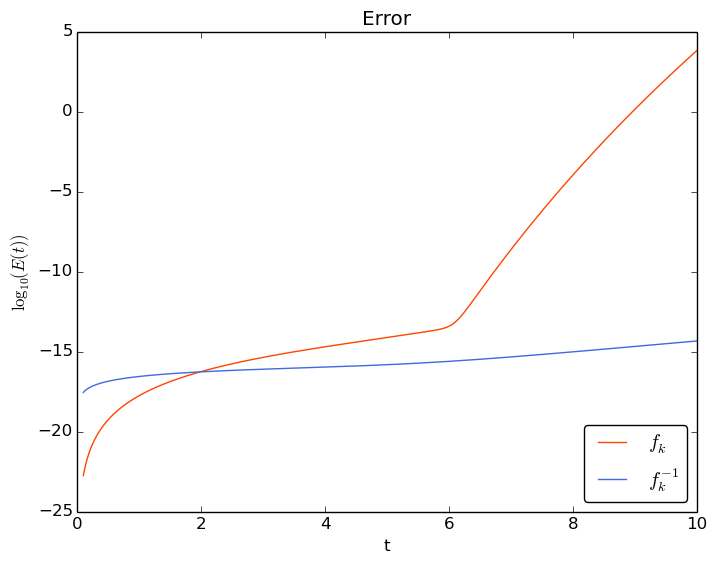

PyObject <matplotlib.legend.Legend object at 0x7f167c85e0d0>

In [9]:
plot(ErrorA[1],log10.(ErrorA[2]),marker= "None", label=L"f_{k}",color="orangered")
plot(ErrorB[1],log10.(ErrorB[2]),marker= "None", label=L"f_{k}^{-1}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [10]:

Conver03U=Convergencia(Wa[1],Wa[2])#Convergencia segun Hadamard
Conver03S=Convergencia(Wb[1],Wb[2])


(Any[-0.0214796, -0.0122036, -0.00849392, -0.00669123, -0.00564675, -0.00496273, -0.00447687, -0.0041119, -0.00382636, -0.00359595  …  -0.00209046, -0.00206195, -0.00203494, -0.00200932, -0.00198497, -0.00196178, -0.00193968, -0.00191857, -0.00189838, -0.00187906], Any[-0.00149813, -0.00116854, -0.000834418, -0.000658959, -0.000556234, -0.000488866, -0.000441006, -0.000405054, -0.000376926, -0.000354229, -0.000335466, -0.00031955, -0.000307063, -0.000288166, -0.000217014])

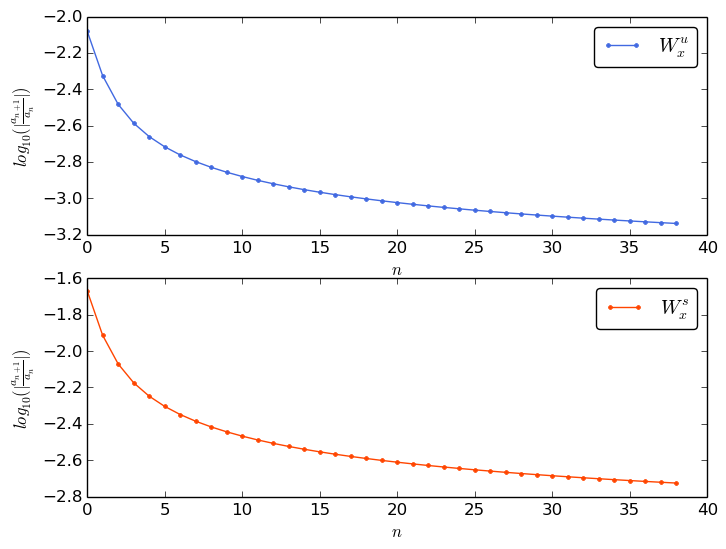

PyObject <matplotlib.legend.Legend object at 0x7f167bdfd990>

In [30]:
Ca1=[log10(abs(Conver03U[1][i])) for i in 1:length(Conver03U[1])]
Cb1=[log10(abs(Conver03S[1][i])) for i in 1:length(Conver03S[1])]

subplot(2,1,1)
plot(Ca1,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cb1,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

In [39]:
digits(BigFloat)

LoadError: [91mMethodError: no method matching digits(::Type{BigFloat})[0m
Closest candidates are:
  digits([91m::Integer[39m) at intfuncs.jl:545
  digits([91m::Integer[39m, [91m::T<:Integer[39m) where T<:Integer at intfuncs.jl:545
  digits([91m::Integer[39m, [91m::T<:Integer[39m, [91m::Integer[39m) where T<:Integer at intfuncs.jl:545
  ...[39m

In [ ]:
OrI = 20
x_fijo = [0.,0.] 
tiempo = [-13.,13.]
delta_t = 0.125
W1, f1, vec_prop_1, val_prop_1 = Estable(estandar2,OrI , x_fijo,tiempo, delta_t);
W2, f2, vec_prop_2, val_prop_2 = Inestable(estandar2,OrI , [0,2*pi],tiempo, delta_t);

Primero calculamos la variedad inestable con un polinomio de orden 20

In [ ]:
Graficar([-.1,-13.4], 0.025, 1.5, W1[1],W1[2],[0.,0.],"orangered")
Graficar([-0.1,-14.2], 0.025, 1.5, W2[1],W2[2],[0.,2*pi],"royalblue")

In [ ]:
tiem = [0.1,15.]
ErrorI_O20 = CalculoError(estandar2,2*pi, W1,f1,tiem,0.025 )
ErrorE_O20 = CalculoError(estandar2,2*pi, W2,f2,tiem,0.025 )


In [ ]:
plot(ErrorI_O20[1],log10.(ErrorI_O20[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorE_O20[1],log10.(ErrorE_O20[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Convergencia

In [ ]:
estandarP(x,y) = EstandarI(x,y,1.5)

In [ ]:
estandarP(1.,2.)

In [ ]:
Orden2 = 120
x_fijo2 = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
W3, f3, vec_prop3, val_prop3 = Inestable(estandarP, Orden2 , x_fijo2,tiempo, delta_t); #estable calculada con el inverso
W4, f4, vec_prop4, val_prop4 = Inestable(estandar2,Orden2 , [0.,2*pi],tiempo, delta_t);

In [ ]:
Graficar([0.,-19.], 0.025, 1.5, -W3[1],-W3[2],[0.,0.],"orangered")
Graficar([-0.1,-14.9], 0.025, 1.5, W4[1],W4[2],[0.,2*pi],"royalblue")

In [ ]:
tiem = [-0.1,-20.]
ErrorI_O60 = CalculoError(estandarP,2*pi, W3,f3,tiem,-0.025 );
ErrorE_O60 = CalculoError(estandar2,2*pi, W4,f4,tiem,-0.025 );


In [ ]:
plot(ErrorI_O60[1],log10.(ErrorI_O60[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorE_O60[1],log10.(ErrorE_O60[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel(L"t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="upper right",fancybox="true" )

In [ ]:
Conver15S=Convergencia(W3[1],W3[2])#Convergencia segun Hadamard
Conver15U=Convergencia(W4[1],W4[2])
subplot(2,1,2)
plot(Conver15S[1],marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,1)
plot(Conver15U[1],marker=".",label=L"W^{u}_{\theta}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

In [ ]:
Orden2 = 70
x_fijo2 = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
W5, f5, vec_prop5, val_prop5 = Estable(estandar3,Orden2 , x_fijo2,tiempo, delta_t)
W6, f6, vec_prop6, val_prop6 = Inestable(estandar3,Orden2 , [0.,2*pi],tiempo, delta_t)

In [ ]:
Graficar([-.1,-6.], 0.025, 0.7, W5[1],W5[2],[0.,0.],"orangered")
Graficar([-0.1,-4.5], 0.025, 0.7, W6[1],W6[2],[0.,2*pi],"royalblue")

In [ ]:
tiem = [0.1,7.]
ErrorI_O70 = CalculoError(estandar3,2*pi, W5,f5,tiem,0.025 )
ErrorE_O70 = CalculoError(estandar3,2*pi, W6,f6,tiem,0.025 )


In [ ]:
plot(ErrorI_O70[1],log10.(ErrorI_O70[2]),marker= "None", label=L"W^{s}",color="orangered")
plot(ErrorE_O70[1],log10.(ErrorE_O70[2]),marker= "None", label=L"W^{u}",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [ ]:
Conver07U=Convergencia(W5[1],W5[2])#Convergencia segun Hadamard
Conver07S=Convergencia(W6[1],W6[2])
subplot(2,1,1)
plot(Conver07U[1],marker=".",label=L"W^{u}_{\theta}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Conver07S[1],marker=".",label=L"W^{s}_{\theta}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )
legend(loc="low right",fancybox="true" )

In [ ]:
function Intersección(p)
    (x,y)=p
    V= SVector( -W3[1](x)-W4[1](y), -W3[2](x)-W4[2](y) )
#    @show(p, V)
end

In [ ]:
X = (-20..(0.0))×(-15..(0.)) # 2D IntervalBox;

In [ ]:
Intersección(X)

In [ ]:
r = roots(Intersección, X, Newton, 1e-6)

In [ ]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [ ]:
px = W3[1](r[1].interval[1].lo)
py = W3[2](r[1].interval[1].lo)
qx = W4[1](r[1].interval[2].hi)
qy = W4[2](r[1].interval[2].hi)
sx = W3[1](r[1].interval[1].hi)
sy = W3[2](r[1].interval[1].hi)
ux = W4[1](r[1].interval[2].lo)
uy = W4[2](r[1].interval[2].lo)

In [ ]:
#|pygui(true)
list_x = [px,qx,sx,ux,px]
list_y = [py,qy,sy,uy,py]
plot(list_x,list_y,"o",linestyle="-")


In [ ]:
(dy-ay)-(cy-by)

In [ ]:
#pygui(true)
Graficar([-.1,-20.0], 0.025, 1.5, -W3[1],-W3[2],[0.,0.],"orangered")
Graficar([-.2,-15], 0.025, 1.5, W4[1],W4[2],[0.,2*pi],"royalblue")

for ind in eachindex(r)
    plot(-W3[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         -W3[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o")
end

In [ ]:
r[1].interval[1].hi<r[1].interval[1].lo

In [ ]:
#pygui(true)
cfig = figure()
Graficar([-.1,-20.0], 0.025, 1.5, W3[1],W3[2],[0.,0.],"orangered")
Graficar([r[1].interval[1].hi,r[1].interval[1].lo], 1e-15, 1.5, W3[1],W3[2],[0.,0.],"green")
#Graficar([-.1,-15.307927223307495], 0.025, 1.5, W4[1],W4[2],[0.,0.],"royalblue")
#x1 = W3[1](r[1].interval[1].lo)
#y1 = W3[2](r[1].interval[1].lo)
#x2 = W3[1](r[1].interval[1].hi)
#y2 = W3[1](r[1].interval[1].hi)



#x_interval = W3[1].([r[1].interval[1].lo, r[1].interval[1].hi])
#y_interval = W3[2].([r[1].interval[1].lo, r[1].interval[1].hi])
#diam_x = x_interval[2]-x_interval[1]
#diam_y = y_interval[2]-y_interval[1]
#plot((x_interval[1],y_interval[1]),"o")

diam_x = qx-px
diam_y = sy-qy

#ax = cfig[:add_subplot](1,1,1)
#ax[:set_aspect]("equal")

#c = patch.Rectangle([px,py],1.3,1.3,fc="green",ec="red",linewidth=.5,alpha=0.2)
#plot([px,qx,sx,ux,px],[py,qy,sy,uy,py],"o",linestyle="-")
#c1 = patch.Rectangle([px,py],1.3,1.3,fc="blue",ec="red",linewidth=.5,alpha=0.2)
#c2 = patch.Rectangle([qx,qy],1.3,1.3,fc="red",ec="red",linewidth=.5,alpha=0.2)
#c3 = patch.Rectangle([ux,uy],1.3,1.3,fc="purpĺe",ec="red",linewidth=.5,alpha=0.2)
#ax[:add_artist](c)
#ax[:add_artist](c1)
#ax[:add_artist](c2)
#ax[:add_artist](c3)
cfig[:savefig]("rectangle.png")
grid("on")




In [ ]:
tiem = [0.1,8.]
ErrorI = CalculoError(estandar2,2*pi, W3,f3,tiem,0.025 )
ErrorE = CalculoError(estandar2,2*pi, W4,f4,tiem,0.025 )
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"$W^{s}$",color="orangered")
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"$W^{u}$",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}$($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [ ]:
Graficar([-0.1,-5.307927223307495], 0.025, 0.7, W5[1],W5[2],[0.,0.],"orangered")
Graficar([-0.1,-4.9], 0.025, 0.7, W6[1],W6[2],[0.,0.],"royalblue")

In [ ]:
tiem = [0.1,5.]
ErrorA = CalculoError(estandar3,2*pi, W5,f5,tiem,0.025 )
ErrorB = CalculoError(estandar3,2*pi, W6,f6,tiem,0.025 )
plot(ErrorA[1],log10.(ErrorA[2]),marker= "None", label=L"$W^{s}$",color="orangered")
plot(ErrorB[1],log10.(ErrorB[2]),marker= "None", label=L"$W^{u}$",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}$($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

In [ ]:
Orden = 35
a= big(pi)
b=parse(BigFloat,"0.")
x_fijo = [b,b] 
c=parse(BigFloat,"4.")
tiempo = [-c,c]
delta_t = parse(BigFloat, "0.125")
W_uB, f_uB, vec_propuB, val_propuB = Inestable(g_estandar,Orden , x_fijo,tiempo, delta_t)
W_sB, f_sB, vec_propsB, val_propsB = Estable(g_estandar,Orden , x_fijo,tiempo, delta_t)

In [ ]:
Graficar([big(0.1),big(4.1)], big(0.025), big(0.3), W_uB[1],W_uB[2],[big(0.),big(0.)])
Graficar([big(0.1),5.], big(0.025), big(0.3), W_sB[1],W_sB[2],[big(0.),big(0.)])

In [ ]:
ErrorIB_O20 = CalculoError(g_estandar,big(2*pi), W_uB,f_uB,[-big(0.),big(4.)],big(0.025) )
ErrorEB_O20 = CalculoError(g_estandar,big(2*pi), W_sB,f_sB,[-big(0.),big(4.)],big(0.025 ))

In [ ]:
plot(ErrorIB_O20[1],log10(ErrorIB_O20[2]),marker= "None", label="Inestable 20")
plot(ErrorEB_O20[1],log10(ErrorEB_O20[2]),marker= "None", label="Estable 20")

xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Cuidado! Esto es para graficar el error de diferentes órdenes de polinomios(tarda un poco)

In [ ]:
O1 = 20
O2 = 25
O3 = 28
O4 = 30
O5 = 35
O6 = 40
O7 = 52
O8 = 60
O9 = 72
O10 = 80
x_fijo = [big(0.),big(0.)] 
tiempo = [-big(3.),big(3.)]
delta_t = big(0.125)
W1, f1, vec1, val1 = Inestable(estandar6,O1 , x_fijo,tiempo, delta_t);
W2, f2, vec2, val2 = Inestable(estandar6,O2 , x_fijo,tiempo, delta_t);
W3, f3, vec3, val3 = Inestable(estandar6,O3 , x_fijo,tiempo, delta_t);
W4, f4, vec4, val4 = Inestable(estandar6,O4 , x_fijo,tiempo, delta_t);
W5, f5, vec5, val5 = Inestable(estandar6,O5 , x_fijo,tiempo, delta_t);
W6, f6, vec6, val6 = Inestable(estandar6,O6 , x_fijo,tiempo, delta_t);
W7, f7, vec7, val7 = Inestable(estandar6,O7 , x_fijo,tiempo, delta_t);
W8, f8, vec8, val8 = Inestable(estandar6,O8 , x_fijo,tiempo, delta_t);
W9, f9, vec9, val9 = Inestable(estandar6,O9 , x_fijo,tiempo, delta_t);
W10, f10, vec10, val10 = Inestable(estandar6,O10 , x_fijo,tiempo, delta_t);

In [ ]:
Tiempo = [big(0.),big(9.)]
Error1A = CalculoError(estandar6, W1,f1,Tiempo,big(0.025) );
Error2A = CalculoError(estandar6, W2,f2,Tiempo,big(0.025 ));
Error3A = CalculoError(estandar6, W3,f3,Tiempo,big(0.025 ));
Error4A = CalculoError(estandar6, W4,f4,Tiempo,big(0.025 ));
Error5A = CalculoError(estandar6, W5,f5,Tiempo,big(0.025 ));
Error6A = CalculoError(estandar6, W6,f6,Tiempo,big(0.025 ));
Error7A = CalculoError(estandar6, W7,f7,Tiempo,big(0.025 ));
Error8A = CalculoError(estandar6, W8,f8,Tiempo,big(0.025 ));
Error9A = CalculoError(estandar6, W9,f9,Tiempo,big(0.025 ));
Error10A = CalculoError(estandar6, W10,f10,Tiempo,big(0.025 ));



In [ ]:
b1=[Float64.(Error1A[1]),Float64.(Error1A[2])];
b2=[Float64.(Error2A[1]),Float64.(Error2A[2])];
b3=[Float64.(Error3A[1]),Float64.(Error3A[2])];
b4=[Float64.(Error4A[1]),Float64.(Error4A[2])];
b5=[Float64.(Error5A[1]),Float64.(Error5A[2])];
b6=[Float64.(Error6A[1]),Float64.(Error6A[2])];
b7=[Float64.(Error7A[1]),Float64.(Error7A[2])];
b8=[Float64.(Error8A[1]),Float64.(Error8A[2])];
b9=[Float64.(Error9A[1]),Float64.(Error9A[2])];
b10=[Float64.(Error10A[1]),Float64.(Error10A[2])];


#grid("on")
#ylim(-16.,-15.2)
#legend(loc="low right",fancybox="true")

In [ ]:
plot(b1[1],log10.(b1[2]),marker= "None", label="$O1")
plot(b2[1],log10.(b2[2]),marker= "None", label="$O2")
plot(b3[1],log10.(b3[2]),marker= "None", label="$O3")
plot(b4[1],log10.(b4[2]),marker= "None", label="$O4")
plot(b5[1],log10.(b5[2]),marker= "None", label="$O5")
plot(b6[1],log10.(b6[2]),marker= "None", label="$O6")
plot(b7[1],log10.(b7[2]),marker= "None", label="$O7", color="orange")
plot(b8[1],log10.(b8[2]),marker= "None", label="$O8", color ="lightgreen" )
plot(b9[1],log10.(b9[2]),marker= "None", label="$O9", color="royalblue")
plot(b10[1],log10.(b10[2]),marker= "None", label="$O10",color="pink")

xlabel("t")
ylabel(L"\log_{10}(E(t))")
title("Error")
legend(loc="low right",fancybox="true")

In [ ]:
O2 = 20
O1 = 10
O5 = 30
O6 = 40
O3 = 25
O4 = 28
O7 = 60
O9 = 90
O8 = 80
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(estandar1,O1 , x_fijo,tiempo, delta_t); 
V2, h2, vec2, val2 = Estable(estandar1,O2 , x_fijo,tiempo, delta_t); 
V3, h3, vec3, val3 = Estable(estandar1,O3 , x_fijo,tiempo, delta_t); 
V4, h4, vec4, val4 = Estable(estandar1,O4 , x_fijo,tiempo, delta_t); 
V5, h5, vec5, val5 = Estable(estandar1,O5 , x_fijo,tiempo, delta_t); 
V6, h6, vec6, val6 = Estable(estandar1,O6 , x_fijo,tiempo, delta_t); 
V7, h7, vec7, val7 = Estable(estandar1,O7 , x_fijo,tiempo, delta_t); 
V8, h8, vec8, val8 = Estable(estandar1,O8 , x_fijo,tiempo, delta_t); 
V9, h9, vec9, val9 = Estable(estandar1,O9 , x_fijo,tiempo, delta_t);

In [ ]:
Tiempo = [0.,7.]
Error1A = CalculoError(estandar1, V1,h1,Tiempo,0.025 );
Error2A = CalculoError(estandar1, V2,h2,Tiempo,0.025 );
Error3A = CalculoError(estandar1, V3,h3,Tiempo,0.025 );
Error4A = CalculoError(estandar1, V4,h4,Tiempo,0.025 );
Error5A = CalculoError(estandar1, V5,h5,Tiempo,0.025 );
Error6A = CalculoError(estandar1, V6,h6,Tiempo,0.025 );
Error7A = CalculoError(estandar1, V7,h7,Tiempo,0.025 );
Error8A = CalculoError(estandar1, V8,h8,Tiempo,0.025 );
Error9A = CalculoError(estandar1, V9,h9,Tiempo,0.025 );



In [ ]:
plot(Error1A[1],log10.(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10.(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10.(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10.(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10.(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10.(Error6A[2]),marker= "None", label="$O6")
plot(Error7A[1],log10.(Error7A[2]),marker= "None", label="$O7")
plot(Error8A[1],log10.(Error8A[2]),marker= "None", label="$O8",color="orange")
plot(Error9A[1],log10.(Error9A[2]),marker= "None", label="$O9",color ="pink")
xlabel("t")
ylabel(L"\log_{10}(E(t))")
#title("Error")
#grid("on")
xlim(0.,9.)
ylim(-20,9.)
legend(loc="lower right",fancybox="true",markerscale=3)